<a href="https://colab.research.google.com/github/csabiu/ML_tutorial/blob/master/Star_Galaxy_Seperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Classification problems

In this notebook we will use decision tree, random forests and SVM to learn a mapping between galaxy magnitudes and object classification (STARS, GALAXIES)



# Load some libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn.model_selection import train_test_split
!pip install gdown

# Download the dataset

In [2]:
import gdown
!gdown https://drive.google.com/uc?id=1Wdy5-wnVFaRK-Xx3j4osQsMDoA6O9VeB

Downloading...
From: https://drive.google.com/uc?id=1Wdy5-wnVFaRK-Xx3j4osQsMDoA6O9VeB
To: /content/SpecPhotodr14_hoyleb.csv.sampled.fits.bz2
100% 244M/244M [00:03<00:00, 73.2MB/s]


# Clean the data (2mins)

In [3]:
d = Table.read('SpecPhotodr14_hoyleb.csv.sampled.fits.bz2')
print('Number of objects:',np.shape(d)[0])
# will perform a bit of data cleaning.
d = d[d['SPEC_Z'] < 1.0]
print('Number of objects:',np.shape(d)[0])

Number of objects: 485120
Number of objects: 404609


In [4]:
#you can look at the all the features available to you
# http://skyserver.sdss.org/dr14/en/help/browser/browser.aspx#&&history=description+PhotoObj+V
print (d.keys())

print('Number of objects:',np.shape(d)[0])

['OBJID', 'RA', 'DEC', 'PHOTPTYPE', 'PHOT_SG', 'FLAGS', 'SATURATED', 'BAD_COUNTS_ERROR', 'BINNED1', 'u', 'g', 'r', 'i', 'z', 'u_err', 'g_err', 'r_err', 'i_err', 'z_err', 'MODELMAGERR_U', 'MODELMAGERR_G', 'MODELMAGERR_R', 'MODELMAGERR_I', 'MODELMAGERR_Z', 'EXTINCTION_U', 'EXTINCTION_G', 'EXTINCTION_R', 'EXTINCTION_I', 'EXTINCTION_Z', 'DERED_U', 'DERED_G', 'DERED_R', 'DERED_I', 'DERED_Z', 'PETRORAD_U', 'PETRORAD_G', 'PETRORAD_R', 'PETRORAD_I', 'PETRORAD_Z', 'PETRORADERR_U', 'PETRORADERR_G', 'PETRORADERR_R', 'PETRORADERR_I', 'PETRORADERR_Z', 'DEVRAD_U', 'DEVRADERR_U', 'DEVRAD_G', 'DEVRADERR_G', 'DEVRAD_R', 'DEVRADERR_R', 'DEVRAD_I', 'DEVRADERR_I', 'DEVRAD_Z', 'DEVRADERR_Z', 'DEVAB_U', 'DEVAB_G', 'DEVAB_R', 'DEVAB_I', 'DEVAB_Z', 'CMODELMAG_U', 'CMODELMAGERR_U', 'CMODELMAG_G', 'CMODELMAGERR_G', 'CMODELMAG_R', 'CMODELMAGERR_R', 'CMODELMAG_I', 'CMODELMAGERR_I', 'CMODELMAG_Z', 'CMODELMAGERR_Z', 'PSFMAG_U', 'PSFMAGERR_U', 'PSFMAG_G', 'PSFMAGERR_G', 'PSFMAG_R', 'PSFMAGERR_R', 'PSFMAG_I', 'PSFMAG

In [6]:
# we will use just dereddend magnitudes 
mags = ['DERED_U', 'DERED_G', 'DERED_R','DERED_I','DERED_Z']
d=d[d[mags[0]]!='null']
d=d[d[mags[1]]!='null']
d=d[d[mags[2]]!='null']
d=d[d[mags[3]]!='null']
d=d[d[mags[4]]!='null'] #remove null values

d=d[d['SPEC_CLASS']!='QSO'] #remove Quasars

def f(x):
    return np.float(x)
f2 = np.vectorize(f)

#and color combinations created from them.
cols= []
for i in range(len(mags)-1):
    for j in range(i+1, len(mags)):
        cols.append(mags[i]+'-' + mags[j])

# let's load these into an input array
inputs = np.zeros((len(d), len(mags+cols)), dtype=float)
for i, key in enumerate(mags):
    inputs[:, i] = np.array(d[key])

cnt = len(mags)
for i in range(len(mags)-1):
    for j in range(i+1, len(mags)):
        inputs[:, cnt] = np.array(f2(d[mags[i]])) - np.array(f2(d[mags[j]]))
        cnt += 1

print('Input shape (N objects, N features):',np.shape(inputs))

Input shape (N objects, N features): (362998, 15)


# for photo-z work
# The target/label values are spectroscopic classifications

In [7]:
d['SPEC_CLASS'][d['SPEC_CLASS']=='STAR']=0
d['SPEC_CLASS'][d['SPEC_CLASS']=='GALAXY']=1

targets=np.float_(np.array(d['SPEC_CLASS']))

# we will split the data into a trainind and testing sample.


In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

print("Training inputs: ",x_train.shape)
print("Training outputs: ",y_train.shape)
print("Testing inputs: ",x_test.shape)
print("Testing outputs: ",y_test.shape)

Training inputs:  (290398, 15)
Training outputs:  (290398,)
Testing inputs:  (72600, 15)
Testing outputs:  (72600,)


In [19]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

#see https://scikit-learn.org/stable/modules/tree.html

#help(DT)

#let's train [.fit()]  a tree on the training sample, and then make predictions on the test sample

In [11]:
clf = DT(random_state=0, max_depth=4)
clf = clf.fit(x_train, y_train)

pred_train  = clf.predict(x_train)
pred_test = clf.predict(x_test)

mse_test = mean_squared_error(y_test, pred_test)
mse_train = mean_squared_error(y_train, pred_train)

print(mse_test, mse_train)


0.0925068870523416 0.09086839441042982


17908
20090
54692
52510
              precision    recall  f1-score   support

        star       0.87      0.78      0.82     20090
      galaxy       0.92      0.96      0.94     52510

    accuracy                           0.91     72600
   macro avg       0.90      0.87      0.88     72600
weighted avg       0.91      0.91      0.91     72600



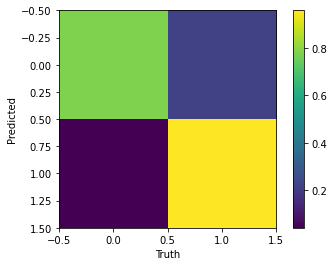

In [15]:
print(sum(pred_test<=0.5))
print(sum(y_test==0))

print(sum(pred_test>0.5))
print(sum(y_test==1))


plt.imshow(confusion_matrix(y_test, pred_test,normalize='true'))
plt.colorbar()
plt.xlabel('Truth')
plt.ylabel('Predicted')


print(classification_report(y_test, pred_test,target_names=['star','galaxy']))

# Lets increase the number of trees -> forest

In [16]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf = RFC(max_depth=10,n_estimators=50)

In [17]:
clf = clf.fit(x_train, y_train)

pred_train  = clf.predict(x_train)
pred_test = clf.predict(x_test)

mse_test = mean_squared_error(y_test, pred_test)
mse_train = mean_squared_error(y_train, pred_train)

print(mse_test, mse_train)

0.05571625344352617 0.04982816686065331


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        star       0.93      0.86      0.90     20090
      galaxy       0.95      0.98      0.96     52510

    accuracy                           0.94     72600
   macro avg       0.94      0.92      0.93     72600
weighted avg       0.94      0.94      0.94     72600



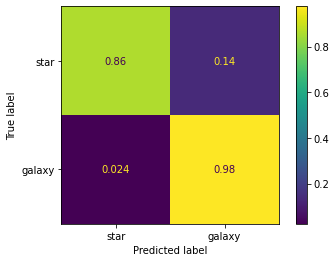

In [26]:
plot_confusion_matrix(clf, x_test, y_test,normalize='true',display_labels=['star','galaxy'])  

print(classification_report(y_test, pred_test,target_names=['star','galaxy']))

### Lets Boost these trees!

In [27]:
from sklearn.ensemble import AdaBoostClassifier as ABC
clf = ABC(base_estimator=DT(max_depth=5), n_estimators=50, random_state=0)

In [28]:
clf = clf.fit(x_train, y_train)

pred_train  = clf.predict(x_train)
pred_test = clf.predict(x_test)

mse_test = mean_squared_error(y_test, pred_test)
mse_train = mean_squared_error(y_train, pred_train)

print(mse_test, mse_train)

0.05574380165289256 0.04841975495699006


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        star       0.91      0.89      0.90     20090
      galaxy       0.96      0.97      0.96     52510

    accuracy                           0.94     72600
   macro avg       0.93      0.93      0.93     72600
weighted avg       0.94      0.94      0.94     72600



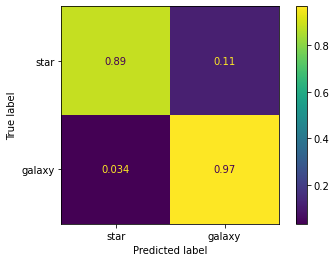

In [29]:
plot_confusion_matrix(clf, x_test, y_test,normalize='true',display_labels=['star','galaxy'])  

print(classification_report(y_test, pred_test,target_names=['star','galaxy']))